## Task
Explore basic statistical methods in SciPy

## Notebook Summary
* Generate random variables
* Get properties of random variables
* Hypothesis testing
* Non-parametrics

## References
* *Numerical Python*, Robert Johansson, APress, 2015


In [2]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import platform
print 'python.version =', platform.python_version()
import IPython
print 'ipython.version =', IPython.version_info

import numpy as np
print 'numpy.version =', np.__version__
import scipy
from scipy import stats
print 'scipy.version =', scipy.__version__

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
print 'matplotlib.version =', mpl.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__


python.version = 2.7.10
ipython.version = (5, 1, 0, '')
numpy.version = 1.11.2
scipy.version = 0.18.1


/Users/vissan1/GitHub/ml-tools-notes/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


matplotlib.version = 1.5.3
seaborn.version =  0.7.1


In [94]:
# Create random variable
X = stats.norm(0,1)

# Get properties of this random var
print '----- mean, std, var'
X.mean(), stats.norm.mean()
X.std(), stats.norm.std()
X.var(), stats.norm.var()
X.stats(), stats.norm.stats() # mean var for Normal r.v.

print '----- First 10 moments'
[X.moment(n) for n in range(10)]

print '----- PDF, CDF, SF'
X.pdf([-1,0,1,2]) # pdf of input values
X.cdf([-1,0,1,2]) # cdf of input values
X.sf([-1,0,1,2]) # survival function := 1 - cdf

print '----- Intervals'
X.interval(0.95) # get middle 95% interval
X.interval(0.5)
X.interval(0.99)

print '----- Generate random variates'
X.rvs(10)

print '----- Get max likelihood estimate'
samples = stats.t(5).rvs(1000) # sample from t-dist
loc, scale = stats.norm.fit(samples)
print 'loc={}, scale={}'.format(loc, scale) # fit a Normal dist. to samples


----- mean, std, var


(0.0, 0.0)

(1.0, 1.0)

(1.0, 1.0)

((array(0.0), array(1.0)), (array(0.0), array(1.0)))

----- First 10 moments


[1.0,
 0.0,
 1.0,
 0.0,
 3.0,
 -1.5022529663236356e-14,
 15.000000000895332,
 -1.7549405358423121e-13,
 104.99999991038254,
 -1.83633236869274e-12]

----- PDF, CDF, SF


array([ 0.24197072,  0.39894228,  0.24197072,  0.05399097])

array([ 0.15865525,  0.5       ,  0.84134475,  0.97724987])

array([ 0.84134475,  0.5       ,  0.15865525,  0.02275013])

----- Intervals


(-1.959963984540054, 1.959963984540054)

(-0.67448975019608171, 0.67448975019608171)

(-2.5758293035489004, 2.5758293035489004)

----- Generate random variates


array([-0.34686722, -0.20561581, -0.16798614,  1.32486625, -1.32399837,
       -2.17515326, -1.34654847, -0.78111341, -0.28806019, -0.128903  ])

----- Get max likelihood estimate
loc=-0.00678129235171, scale=1.28611479719


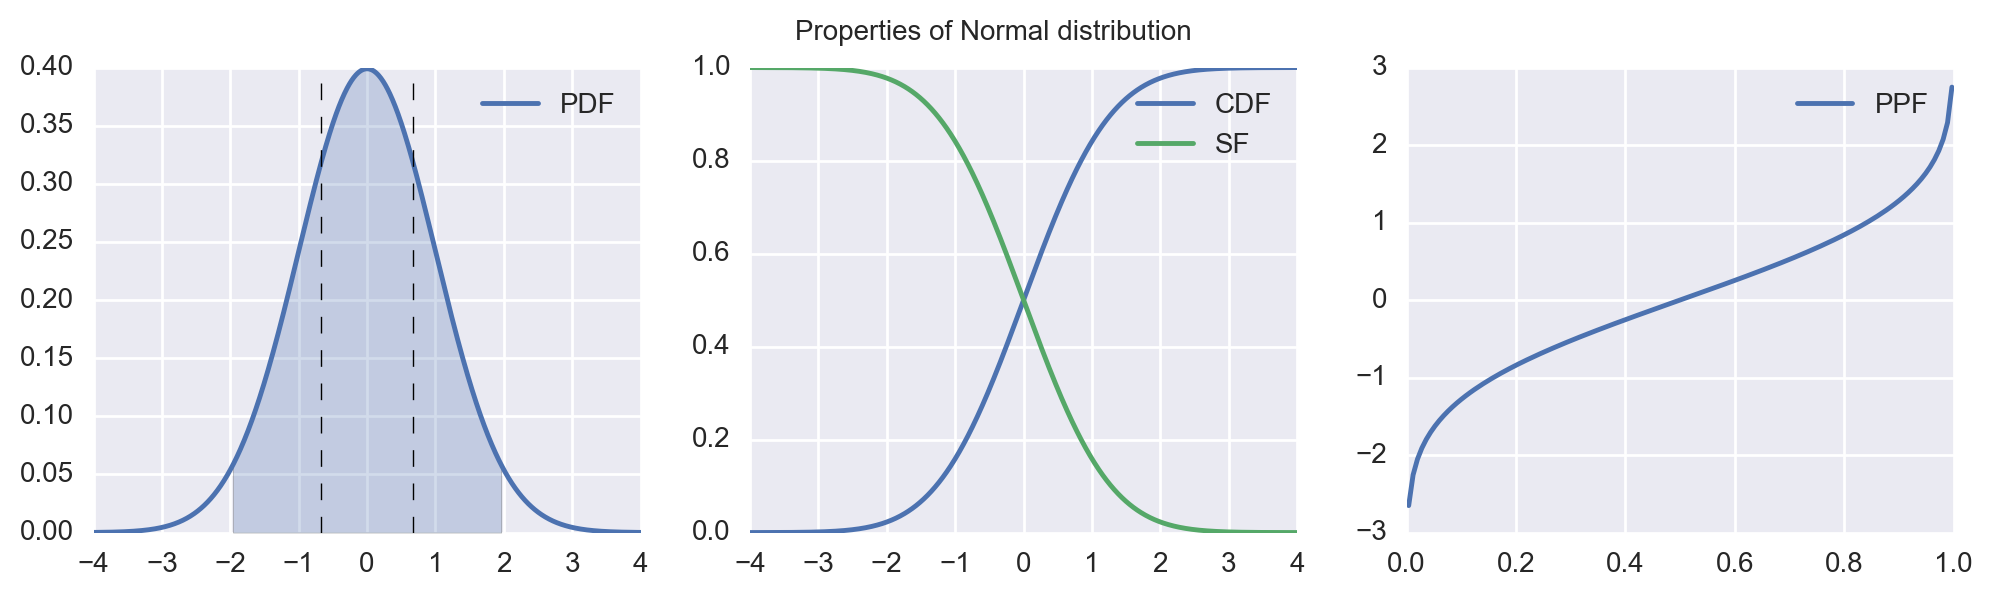

In [95]:
# plot Normal(0,1) distribution and highlight middle 50% and 95% of distribution

fig, ax = plt.subplots(1,3, figsize=(12,3));

X = stats.norm(0,1)
support = np.linspace(-4, 4, 1000)
ax[0].plot(support, X.pdf(support), label="PDF");
ax[1].plot(support, X.cdf(support), label="CDF");
ax[1].plot(support, X.sf(support), label="SF");
ax[2].plot(support, X.ppf(support), label="PPF");

mn, mx = X.interval(0.95)
support95 = np.linspace(mn, mx, 1000)
ax[0].fill_between(support95, X.pdf(support95), alpha=0.25)

mn, mx = X.interval(0.5)
ax[0].axvline(x=mn, linestyle='--', linewidth=0.5, color='k')
ax[0].axvline(x=mx, linestyle='--', linewidth=0.5, color='k')

plt.suptitle('Properties of Normal distribution')

for a in ax:
    a.legend()


## Non-parametrics


* Kernel density estimation - estimate PDF of a random variable in a non-parametric way
* Kernel density estimate is a smoothened version of histogram of samples
* PDF = $\hat f(x) = \frac{1}{n \cdot b}\sum\limits_{i=0}^{n} K \big(\frac{x-x_i}{b}\big)$, where $b$ is bandwidth and $K$ is the kernel function.
* Bandwidth determines the influence of each term in sum
* Gaussian kernels are popular for smooth shape with local support and ease of computation (has automatic bandwidth estimation). Works for both univariate & multi-variate data. Works best with univariate distributions. Multi-modal distributions tend to be over-smoothed.


(array([ 0.00072405,  0.        ,  0.00108607,  0.00362024,  0.00289619,
         0.01629108,  0.01701513,  0.02063537,  0.03077204,  0.03946061,
         0.03692645,  0.03584037,  0.04090871,  0.03946061,  0.02389358,
         0.01918727,  0.01448096,  0.00724048,  0.00289619,  0.00362024,
         0.00253417,  0.00108607,  0.        ,  0.00036202,  0.00108607]),
 array([-27.07070476, -24.30845688, -21.54620899, -18.7839611 ,
        -16.02171321, -13.25946532, -10.49721743,  -7.73496954,
         -4.97272166,  -2.21047377,   0.55177412,   3.31402201,
          6.0762699 ,   8.83851779,  11.60076568,  14.36301357,
         17.12526145,  19.88750934,  22.64975723,  25.41200512,
         28.17425301,  30.9365009 ,  33.69874879,  36.46099667,
         39.22324456,  41.98549245]),
 <a list of 25 Patch objects>)

----- Samples from KDE


array([[  2.61203450e+01,   1.33453318e+01,   3.05352476e+00,
          7.11570577e-03,  -4.18466838e+00,  -1.12467218e+00,
          4.69840978e+00,   6.48737750e+00,   2.83580698e+00,
          5.07896933e+00]])

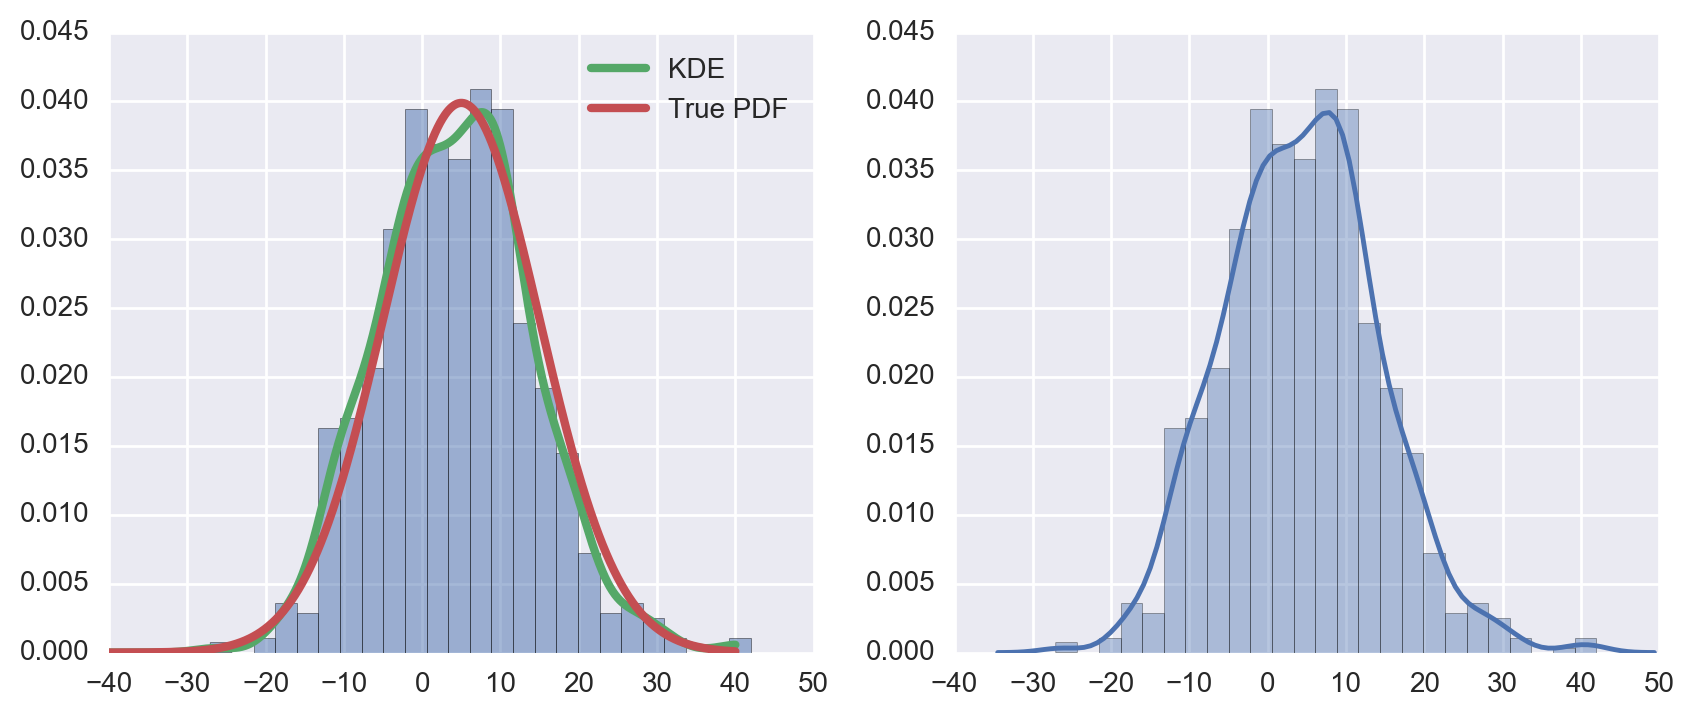

In [38]:
# Compare Gaussian KDE to true PDF for Normal dist.

samples = stats.norm(5, 10).rvs(1000)
kernel = stats.gaussian_kde(samples)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(samples, normed=True, alpha=0.5, bins=25)
x = np.linspace(-40, 40, 1000)
ax[0].plot(x, kernel.pdf(x), linewidth=3, label='KDE')
ax[0].plot(x, stats.norm(5,10).pdf(x), linewidth=3, label='True PDF')
ax[0].legend()

sns.distplot(samples, bins=25, ax=ax[1])

print '----- Samples from KDE'
kernel.resample(10)
# ToDo - CDF, SF, PPF with KDE
